# Project Introduction

*Project* ini berisikan tentang penerapan **LinearRegression** pada dataset Uber & Lyft yang dapat diakses di [sini](https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma). Dataset ini terdiri dari 693071 observasi/baris dan 57 fitur/kolom tentang data harga perjalanan menggunakan taksi Uber & Lyft berdasarkan waktu, penggandaan harga (*surge multiplier*), jarak, dan keadaan cuaca pada saat itu. Variabel dependen/responnya adalah `price`. **LinearRegression** digunakan untuk mengetahui bagaimana pengaruh waktu, penggandaan harga, jarak, dan keadaan cuaca terhadap variasi harga dan juga mendapatkan model prediksi harga armada Uber/Lyft berdasarkan faktor-faktor yang diketahui.

---

**Konsep Dasar Linear Regression**

*Linear Regression* atau regresi linear adalah salah satu teknik statistik yang digunakan untuk mengetahui hubungan linear antara variabel independen (*features*) terhadap variabel dependennya (target). Regresi termasuk dalam *Supervised Learning*. Secara umum, persamaan regresi linear dengan $n$ variabel independen adalah sebagai berikut:

$ y = \beta_0 + \beta_ix_i + e ; i=1,2,...,n $

dengan:

$y$ : variabel dependen/respon/target

$\beta_0$ : intersep

$\beta_i$ : koefisien regresi/slope ke-$i$

$x_i$ : variabel independen/*features*/prediktor ke-$i$

$e$ : galat/*error*

*Linear Regression* menghitung estimator dari koefisien regresi atau *predicted weights* dilambangkan dengan $\beta_0, \beta_1, \beta_2,...,\beta_n$. Koefisien regresi ini mendefinisikan estimasi fungsi regresi dan harus menangkap ketergantungan antar variabel dengan baik. Hasil prediksi dari fungsi regresi yang didapat untuk setiap pengamatan harus sedekat mungkin dengan *actual response* sesuai dengan $y_i$. Selisih antara hasil prediksi dengan nilai sebenarnya disebut dengan galat. Regresi adalah tentang menentukan **best predicted weights**, yaitu nilai/bobot yang sesuai dengan galat terkecil. Untuk mendapatkan bobot terbaik, biasanya kita meminimalkan *Sum of Square Residuals* (SSR) untuk semua pengamatan. Pendekatan ini dinamakan *Ordinary Least Square* (OLS).

Untuk mengetahui seberapa baik performa fungsi regresi yang didapat biasanya menggunakan nilai **koefisien determinasi** dilambangkan dengan $R^2$. Nilai ini memberi tahu kita berapa banyak variasi dalam $y$ yang dapat dijelaskan oleh ketergantungan pada $x$. Lebih besar nilai $R^2$ menunjukkan kesesuaian yang lebih baik dan berarti bahwa model/fungsi yang didapat menjelaskan variasi keluaran dengan masukan yang berbeda dengan baik.

**Important Notes:**
- Terdapat beberapa asumsi yang harus dipertimbangkan untuk menyelesaikan permasalahan dalam *LinearRegression*, seperti normalitas data, kesamaan varians antar variabel prediktor, dan lain-lain.
- Apabila *LinearRegression* digunakan untuk tujuan mengetahui signifikansi antar variabel independen terhadap dependennya, diperlukan pengujian hipotesis dengan nilai statistik $t$ dan ANOVA.
- Terdapat beberapa jenis persamaan regresi, seperti *Simple Linear Regression*, *Multiple Linear Regression*, dan *Polynomial Regression*.

Sumber:
https://www.kode.id/courses/take/introduction-to-python-for-data-science-km/texts/25596516-regression-models
https://www.kaggle.com/satyajitmaitra/linear-regression#Practical-Guide-To-Linear-Regression

# Import pustaka yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pickle

# Data loading

In [3]:
df = pd.read_csv("rideshare_kaggle.csv")
pd.set_option("display.max_columns", 57)

In [3]:
# 5 data pertama
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
# 5 data terakhir
df.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,10.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [5]:
# Dimensi dari dataset
print(df.shape)

# Ringkasan data
print(df.info())

(693071, 57)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null 

Seperti yang sudah diketahui bahwa dataset terdiri dari 693071 baris dan 57 kolom. Terdapat 29 tipe data yang memiliki tipe *float*, 17 data dengan tipe *integer*, dan 11 data dengan tipe *object*/kategori.

# Eksplorasi data

Akan dilakukan analisis eksplorasi data untuk mengetahui informasi dalam data dengan visualisasi. Eksplorasi data juga bertujuan untuk mencari tahu apa saja variabel yang diduga berpengaruh dalam variasi harga taksi Uber & Lyft.

## Korelasi antara harga, penggandaan harga, dan jarak

In [6]:
#Memisahkan dataframe menjadi dua , datarframe Uber dan dataset Lyft
df_vis = df.copy()
df_vis = df_vis[["distance", "price", "surge_multiplier", "cab_type"]]
df_uber = df_vis[df_vis['cab_type'] =="Uber"]
df_lyft = df_vis[df_vis['cab_type'] =="Lyft"]

                  distance     price  surge_multiplier
distance          1.000000  0.336204               NaN
price             0.336204  1.000000               NaN
surge_multiplier       NaN       NaN               NaN


<AxesSubplot:>

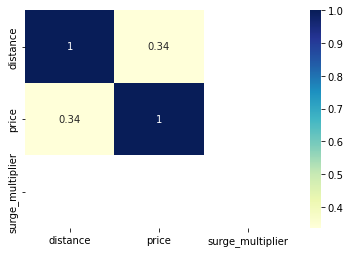

In [13]:
# Menghitung koefisien korelasi pada dataframe Uber
print(df_uber.corr())

# Plotting correlation heatmap
sns.heatmap(df_uber.corr(), cmap="YlGnBu", annot=True)

Diketahui bahwa Uber tidak memberlakukan penggandaan harga, karena pada kolom `surge_multiplier` hanya terdapat satu nilai unik. Berdasarkan plot di atas, korelasi antar `distance` dan `price` adalah 0.34. Artinya jarak dan harga saling berpengaruh secara positif tetapi tidak terlalu kuat. Dalam kata lain, semakin jauh jarak yang ditempuh, maka harga akan naik.

                  distance     price  surge_multiplier
distance          1.000000  0.361567          0.040076
price             0.361567  1.000000          0.308237
surge_multiplier  0.040076  0.308237          1.000000


<AxesSubplot:>

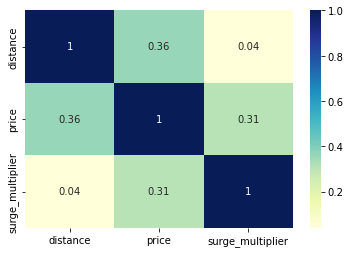

In [14]:
# Menghitung koefisien korelasi pada dataframe Lyft
print(df_lyft.corr())

# Plotting correlation heatmap
sns.heatmap(df_lyft.corr(), cmap="YlGnBu", annot=True)

Diketahui bahwa Lyft adalah taksi yang memberlakukan penggandaan harga. Berdasarkan plot di atas, diketahui bahwa `price` dan `distance` memiliki nilai koefisien korelasi positif sebesar 0.36. Artinya, harga dan jarak saling berpengaruh secara positif tetapi tidak terlalu kuat. Dalam kata lain, semakin jauh jarak yang ditempuh maka akan semakin naik juga harganya. Begitu pun dengan `price` dan `surge_multiplier` yang memiliki nilai koefisien korelasi positif sebesar 0.31 yang berarti saling berpengaruh secara positif tetapi tidak terlalu kuat. Kenaikan penggandaan harga akan diikuti dengan kenaikan harga pula.

---

Dari kedua plot di atas, dapat disimpulkan bahwa hubungan harga dengan jarak dan penggandaan harga pada kedua taksi sama-sama berpengaruh positif tetapi tidak terlalu kuat dengan koefisien korelasi sebesar 0.3.

## Scatterplot `price` vs `distance`

Text(0, 0.5, 'Price')

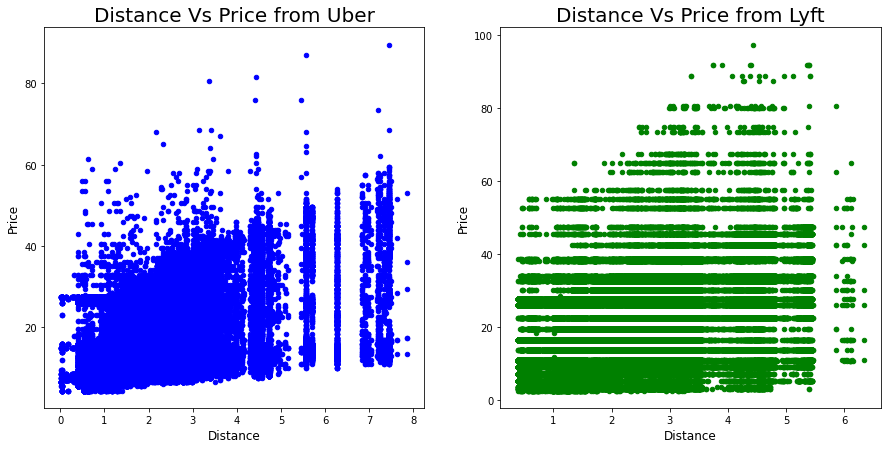

In [20]:
#Membuat subplot untuk scatterplot pada dataframe Uber & Lyft
fig = plt.figure(figsize=(15,7))

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

#Scatterplot untuk dataframe Uber
df_uber.plot(kind="scatter", x="distance", y="price", ax=ax0, color="blue")
ax0.set_title("Distance Vs Price from Uber", fontsize=20)
ax0.set_xlabel("Distance", fontsize=12)
ax0.set_ylabel("Price", fontsize=12)

#Scatterplot untuk dataframe Lyft
df_lyft.plot(kind="scatter", x="distance", y="price", ax=ax1, color="green")
ax1.set_title("Distance Vs Price from Lyft", fontsize=20)
ax1.set_xlabel("Distance", fontsize=12)
ax1.set_ylabel("Price", fontsize=12)

Berdasarkan scatterplot di atas, menunjukkan perbandingan antara jarak (`distance`) dengan harga (`price`). Dimana pada plot tersebut terlihat bahwa `price` tidak terlalu bertambah saat `distance` bertambah, hal ini juga ditunjukkan oleh koefisien korelasi yang tidak terlalu besar sehingga hubungan linearnya tidak terlalu kuat. Pola yang dibentuk oleh Uber dan Lyft juga menunjukkan perbedaan. Titik persebaran pada taksi Lyft lebih konstan dibanding dengan Uber, hal ini dikarenakan terdapat penggandaan harga yang diberlakukan oleh taksi Lyft.

## Rata-rata harga berdasarkan jarak yang ditempuh pada masing-masing tipe taksi

In [108]:
#Dataframe Uber & Lyft dengan jarak dan waktunya
df_ride = df_ride_share[["cab_type","distance","price"]]
df_ride.dropna(axis=0, inplace=True)
df_ride.head()

C:\Users\Shavira Zhalsabilla\anaconda3\envs\tf\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,cab_type,distance,price
0,Lyft,0.44,5.0
1,Lyft,0.44,11.0
2,Lyft,0.44,7.0
3,Lyft,0.44,26.0
4,Lyft,0.44,9.0


In [119]:
#Pivot table distance & price berdasarkan tipe taksi (missing values diabaikan)
df_price = pd.pivot_table(df_ride, columns="cab_type", index="distance", values="price", aggfunc=np.mean)
df_price.head()

cab_type,Lyft,Uber
distance,,
0.02,NaN,11.850000
0.03,NaN,11.666667
0.04,NaN,12.000000
0.12,NaN,12.000000
0.17,NaN,11.583333


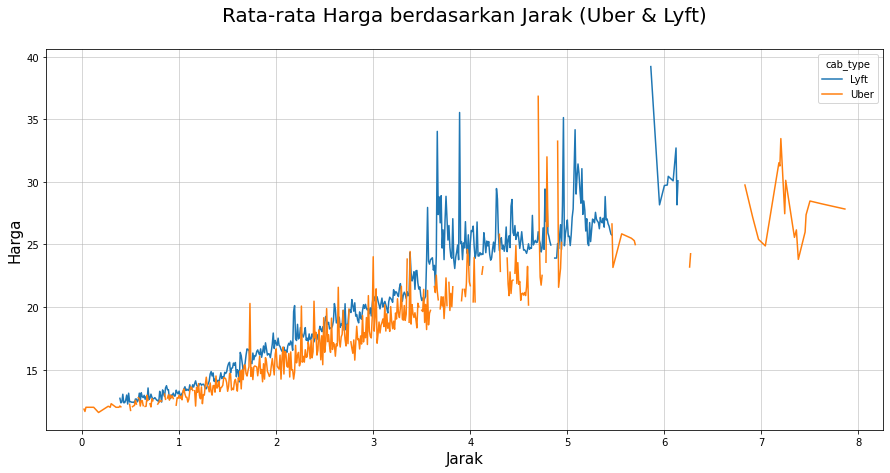

In [121]:
#Plotting rata-rata harga berdasarkan jarak masing-masing taksi
df_price.plot(kind="line", figsize=(15,7))
plt.title("Rata-rata Harga berdasarkan Jarak (Uber & Lyft)\n", fontsize=20)
plt.xlabel("Jarak", fontsize=15)
plt.ylabel("Harga", fontsize=15)
plt.grid(linewidth=0.5)
plt.show()

Berdasarkan plot di atas, diketahui bahwa Uber cenderung menawarkan harga yang lebih rendah dibanding Lyft, sehingga Uber lebih ekonomis dibandingkan Lyft, tetapi Lyft juga menawarkan harga yang kompetitif.

## Hubungan antara keterangan waktu dan penggandaan harga

In [10]:
# Dataframe Uber & Lyft dengan keterangan waktu
df_ride_share = df[['distance', 'cab_type', 'timestamp', 'destination', 'source', 'price',
                    'surge_multiplier', 'name']]

#Mengetahui adanya missing values pada data
df_ride_share.isnull().sum()

distance                0
cab_type                0
timestamp               0
destination             0
source                  0
price               55095
surge_multiplier        0
name                    0
dtype: int64

Diketahui terdapat 55095 *missing values* pada kolom `price`.

In [13]:
#Menghapus baris yang mengandung missing values
df_ride_share.dropna(inplace=True)
df_ride_share.isnull().sum()

C:\Users\Shavira Zhalsabilla\anaconda3\envs\tf\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


distance            0
cab_type            0
timestamp           0
destination         0
source              0
price               0
surge_multiplier    0
name                0
dtype: int64

In [14]:
#Mengubah format pada kolom timestamp menjadi format timestamp 
df_ride_share["timestamp"] = df_ride_share['timestamp'].apply(lambda timestamp: datetime.fromtimestamp(timestamp))

#Menambahkan kolom date
df_ride_share["date"] = pd.to_datetime(df_ride_share["timestamp"]).dt.date

#Menambahkan kolom waktu
df_ride_share["time"] = pd.to_datetime(df_ride_share["timestamp"]).dt.time

#Menambahkan kolom jam
df_ride_share["hour"] = df_ride_share['timestamp'].dt.hour

#Menambahkan kolom hari
df_ride_share["weekday"] = df_ride_share["date"].apply(lambda x: x.weekday())
df_ride_share["weekday"] = df_ride_share["weekday"].map({0: 'Monday', 
                                                         1: 'Tuesday', 
                                                         2: 'Wednesday', 
                                                         3: 'Thursday', 
                                                         4: 'Friday', 
                                                         5: 'Saturday', 
                                                         6: 'Sunday'})

#Menambahkan kolom keterangan waktu pada saat itu sesuai dengan jamnya
df_ride_share.loc[(df_ride_share.hour >= 6) & (df_ride_share.hour < 12) , 'time_of_day'] = 'Morning'
df_ride_share.loc[(df_ride_share.hour >= 12) & (df_ride_share.hour < 15) , 'time_of_day'] = 'Afternoon'
df_ride_share.loc[(df_ride_share.hour >= 15) & (df_ride_share.hour < 18) , 'time_of_day'] = 'Evening'
df_ride_share.loc[(df_ride_share.hour >= 18) | (df_ride_share.hour < 6) , 'time_of_day'] = 'Night'


df_ride_share = df_ride_share[['distance', 'cab_type', 'timestamp', 'destination', 'source', 'price', 'surge_multiplier', 
                               'name', 'date', 'time', 'weekday', 'hour', 'time_of_day']]

df_ride_share

<ipython-input-14-059f4bcd6dbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ride_share["timestamp"] = df_ride_share['timestamp'].apply(lambda timestamp: datetime.fromtimestamp(timestamp))
<ipython-input-14-059f4bcd6dbf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ride_share["date"] = pd.to_datetime(df_ride_share["timestamp"]).dt.date
<ipython-input-14-059f4bcd6dbf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,distance,cab_type,timestamp,destination,source,price,surge_multiplier,name,date,time,weekday,hour,time_of_day
0,0.44,Lyft,2018-12-16 16:30:07.890,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16,16:30:07.890000,Sunday,16,Evening
1,0.44,Lyft,2018-11-27 09:00:23.677,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27,09:00:23.677000,Tuesday,9,Morning
2,0.44,Lyft,2018-11-28 08:00:22.198,North Station,Haymarket Square,7.0,1.0,Lyft,2018-11-28,08:00:22.198000,Wednesday,8,Morning
3,0.44,Lyft,2018-11-30 11:53:02.749,North Station,Haymarket Square,26.0,1.0,Lux Black XL,2018-11-30,11:53:02.749000,Friday,11,Morning
4,0.44,Lyft,2018-11-29 10:49:20.223,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-29,10:49:20.223000,Thursday,10,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.00,Uber,2018-12-02 06:53:06.000,North End,West End,9.5,1.0,WAV,2018-12-02,06:53:06,Sunday,6,Morning
693066,1.00,Uber,2018-12-02 06:53:06.000,North End,West End,13.0,1.0,UberXL,2018-12-02,06:53:06,Sunday,6,Morning
693067,1.00,Uber,2018-12-02 06:53:06.000,North End,West End,9.5,1.0,UberX,2018-12-02,06:53:06,Sunday,6,Morning
693069,1.00,Uber,2018-12-02 06:53:06.000,North End,West End,27.0,1.0,Black SUV,2018-12-02,06:53:06,Sunday,6,Morning


In [15]:
#Memisahkan dataframe Uber dan Lyft
df_uber = df_ride_share[df_ride_share['cab_type'] =="Uber"]
df_lyft = df_ride_share[df_ride_share['cab_type'] =="Lyft"]

In [18]:
#Menghitung jumlah masing-masing kategori penggandaan harga
print("Penggandaan harga pada taksi Uber:\n", df_uber["surge_multiplier"].value_counts())
print("Penggandaan harga pada taksi Lyft:\n", df_lyft["surge_multiplier"].value_counts())

Penggandaan harga pada taksi Uber:
 1.0    330568
Name: surge_multiplier, dtype: int64
Penggandaan harga pada taksi Lyft:
 1.00    286433
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64


Diketahui bahwa taksi Lyft memberlakukan penggandaan harga 1.00 paling banyak.

In [19]:
#memilih nilai "surge_multiplier" > 1 pada dataframe Lyft
surge_multiplier_above_1 = df_lyft[df_lyft["surge_multiplier"]> 1]

#Membuat dataframe yang berisi penggandaan harga yang dilakukan sesuai dengan keterangan waktu pada saat itu
td_high_surge = pd.DataFrame(surge_multiplier_above_1.groupby(["weekday", "surge_multiplier","time_of_day"]).size().reset_index())
td_high_surge.columns = ["Weekday", "Surge", "Time of Day", "Count"]
td_high_surge.head()

,Weekday,Surge,Time of Day,Count
0,Friday,1.25,Afternoon,158
1,Friday,1.25,Evening,209
2,Friday,1.25,Morning,296
3,Friday,1.25,Night,751
4,Friday,1.50,Afternoon,59


Text(0.5, 1.0, 'Penggandaan Harga berdasarkan Keterangan waktu')

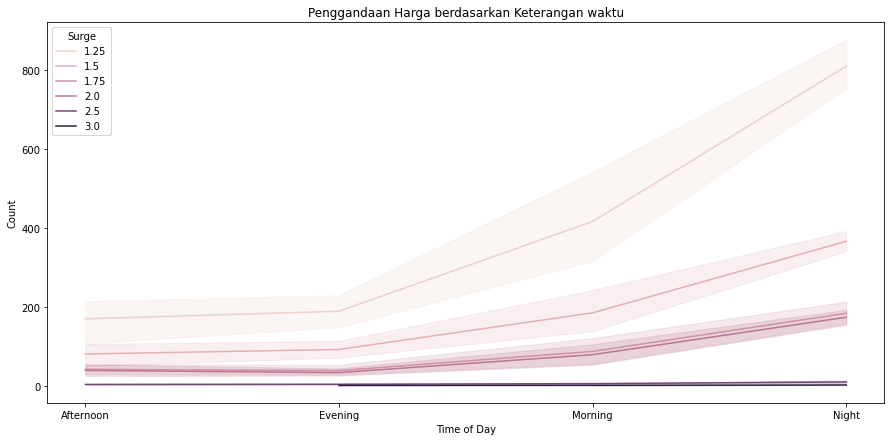

In [21]:
#Plotting
plt.figure(figsize=(15,7))
sns.lineplot(x="Time of Day", y="Count", hue="Surge", data=td_high_surge).set_title("Penggandaan Harga berdasarkan Keterangan waktu")

Berdasarkan plot di atas, diketahui pemberlakuan penggandaan harga semakin banyak pada saat pagi dan malam untuk penggandaan harga 1.25-2.5. Sedangkan pada penggandaan harga 3.0 tidak mengalami kenaikan atau penurunan jumlah pada waktu-waktu tertentu.

---

Dapat disimpulkan bahwa Lyft memberlakukan penggandaan harga paling banyak di malam hari dengan kategori penggandaan harga 1.25-2.5. Untuk Uber tidak memberlakukan penggandaan harga. Sehingga, berdasarkan penggandaan harga yang diberlakukan, harga taksi Lyft cenderung lebih tinggi di malam hari.

## Jumlah perjalanan Uber dan Lyft berdasarkan keterangan waktu

In [55]:
#Membentuk dataframe jumlah taksi Uber dan Lyft berdasarkan jam
df_lyft_counttime = df_lyft[["cab_type","hour"]]
df_uber_counttime = df_uber[["cab_type","hour"]]
df_lyft_counttime = df_lyft_counttime.groupby("hour").count()
df_uber_counttime = df_uber_counttime.groupby("hour").count()
df_counttime = df_uber_baru.copy()
df_counttime["cab_type_lyft"] = df_lyft_baru["cab_type"]
df_counttime.rename(columns = {'cab_type':'cab_type_uber'}, inplace = True)
df_counttime.head()

,cab_type_uber,cab_type_lyft
hour,,
0,14222,13853
1,14554,13404
2,12949,12461
3,12905,11715
4,13069,12480


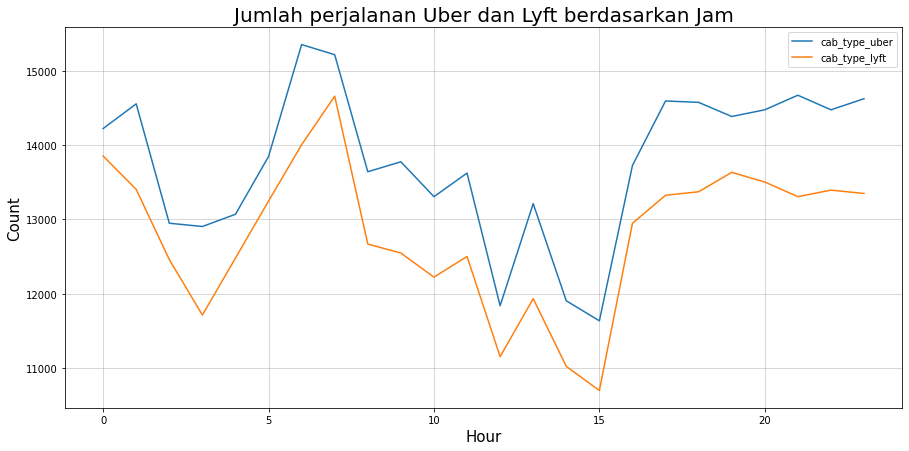

In [56]:
#Plotting data
df_counttime.plot(kind="line", figsize=(15,7))
plt.title("Jumlah perjalanan Uber dan Lyft berdasarkan Jam", fontsize=20)
plt.xlabel("Hour",fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.grid(linewidth=0.5)
plt.show()

Berdasarkan plot di atas, diketahui bahwa jumlah perjalanan Uber dan Lyft tinggi pada rentang jam 5 sampai 10 pagi, dan menurun pada jam 10 sampai jam 3 sore. Selanjutnya diikuti kenaikan pada jam 3 sore sampai dengan jam 8 malam.

---

Dapat disimpulkan bahwa karena kenaikan jumlah pengguna taksi Uber dan Lyft pada pagi dan malam hari, maka diikuti pemberlakuan penggandaan harga pada pagi dan malam hari berdasarkan yang sudah diketahui sebelumnya.

## Hubungan antara tipe taksi Uber dan Lyft dengan harga

In [11]:
df_ride_share

,distance,cab_type,timestamp,destination,source,price,surge_multiplier,name
0,0.44,Lyft,1.544953e+09,North Station,Haymarket Square,5.0,1.0,Shared
1,0.44,Lyft,1.543284e+09,North Station,Haymarket Square,11.0,1.0,Lux
2,0.44,Lyft,1.543367e+09,North Station,Haymarket Square,7.0,1.0,Lyft
3,0.44,Lyft,1.543554e+09,North Station,Haymarket Square,26.0,1.0,Lux Black XL
4,0.44,Lyft,1.543463e+09,North Station,Haymarket Square,9.0,1.0,Lyft XL
...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1.543708e+09,North End,West End,13.0,1.0,UberXL
693067,1.00,Uber,1.543708e+09,North End,West End,9.5,1.0,UberX
693068,1.00,Uber,1.543708e+09,North End,West End,NaN,1.0,Taxi
693069,1.00,Uber,1.543708e+09,North End,West End,27.0,1.0,Black SUV


In [13]:
#,Memisahkan dataset Uber dan Lyft
df_uber_types = df_ride_share[df_ride_share['cab_type'] =="Uber"]
df_lyft_types = df_ride_share[df_ride_share['cab_type'] =="Lyft"]

In [15]:
df_lyft_types = df_lyft_types[["name","distance","price"]]
df_uber_types = df_uber_types[["name","distance","price"]]

In [16]:
#Membuat tabel pivot yang berisi rata-rata harga berdasarkan jarak sesuai dengan tipe taksi
pivot_lyft = pd.pivot_table(df_lyft_types, columns="name", index="distance")
pivot_uber = pd.pivot_table(df_uber_types, columns="name", index="distance")

Text(0, 0.5, 'Price')

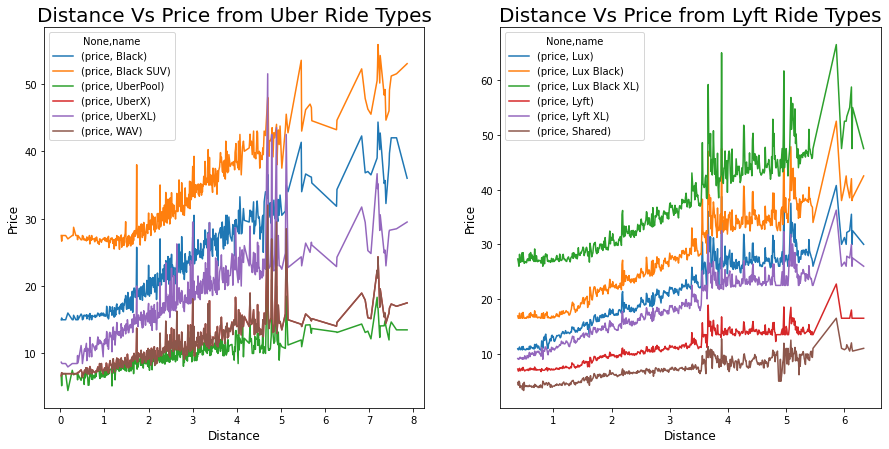

In [19]:
#Membuat subplot untuk line plot pada dataframe Uber & Lyft
fig = plt.figure(figsize=(15,7))

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

#Line plot untuk dataframe Uber
pivot_uber.plot(kind="line", ax=ax0)
ax0.set_title("Distance Vs Price from Uber Ride Types", fontsize=20)
ax0.set_xlabel("Distance", fontsize=12)
ax0.set_ylabel("Price", fontsize=12)

#Line plot untuk dataframe Lyft
pivot_lyft.plot(kind="line", ax=ax1)
ax1.set_title("Distance Vs Price from Lyft Ride Types", fontsize=20)
ax1.set_xlabel("Distance", fontsize=12)
ax1.set_ylabel("Price", fontsize=12)

Berdasarkan plot di atas diketahui bahwa tipe taksi Lux Black XL pada Lyft dan tipe taksi Black SUV pada Uber adalah tipe yang memiliki kategoti harga paling tinggi. Tipe taksi Shared pada Lyft dan tipe taksi UberPool pada Uber adalah tipe yang memiliki kategori harga paling rendah.

## Hubungan cuaca dengan jumlah pelanggan dan variasi harga taksi

In [53]:
#Dataframe dengan kolom cuaca
'''Kolom karakteristik cuaca yang disertakan dalam dataset:
-temperature
-short_summary: yang berisi ringkasan singkat keterangan cuaca pada saat itu
-windGust: kecepatan angin
-precipIntensityMax: curah hujan
'''

df_weather = df[["cab_type","temperature","short_summary","windGust","precipIntensityMax","price"]]
df_weather.head()

,cab_type,temperature,short_summary,windGust,precipIntensityMax,price
0,Lyft,42.34,Mostly Cloudy,9.17,0.1276,5.0
1,Lyft,43.58,Rain,11.98,0.1300,11.0
2,Lyft,38.33,Clear,7.33,0.1064,7.0
3,Lyft,34.38,Clear,5.28,0.0000,26.0
4,Lyft,37.44,Partly Cloudy,9.14,0.0001,9.0


In [54]:
#Temperature
df_temp = df_weather["temperature"]
df_temp

0         42.34
1         43.58
2         38.33
3         34.38
4         37.44
          ...  
693066    37.05
693067    37.05
693068    37.05
693069    37.05
693070    37.05
Name: temperature, Length: 693071, dtype: float64

In [82]:
#Dataframe temperature dengan rata-rata harga
df_temp_price = df_weather[["temperature","price"]]
df_temp_price = df_temp_price.groupby("temperature").mean()
df_temp_price

,price
temperature,
18.91,16.668028
18.97,16.584302
19.28,16.469346
20.01,16.565230
20.07,16.549014
...,...
53.51,16.383633
54.38,16.519062
54.59,16.389884


In [83]:
#Dataframe precipIntensityMax dengan rata-rata harga
df_precip = df_weather[["precipIntensityMax", "price"]]
df_precip = df_precip.groupby("precipIntensityMax").mean()
df_precip

,price
precipIntensityMax,
0.0000,16.561727
0.0001,16.542801
0.0003,16.470152
0.0004,16.450532
0.0005,16.507372
...,...
0.1429,16.498392
0.1430,16.520948
0.1433,16.634755


In [84]:
#Jumlah rides berdasarkan short_summary
df_sum = df_weather[["cab_type","short_summary"]]
df_sum = df_sum.groupby("short_summary").count()
df_sum

,cab_type
short_summary,
Clear,87126
Drizzle,7296
Foggy,9060
Light Rain,54912
Mostly Cloudy,146210
Overcast,218895
Partly Cloudy,127224
Possible Drizzle,18636
Rain,23712


Text(0.5, 1.0, 'Proporsi Jumlah Rides berdasarkan Short Summary')

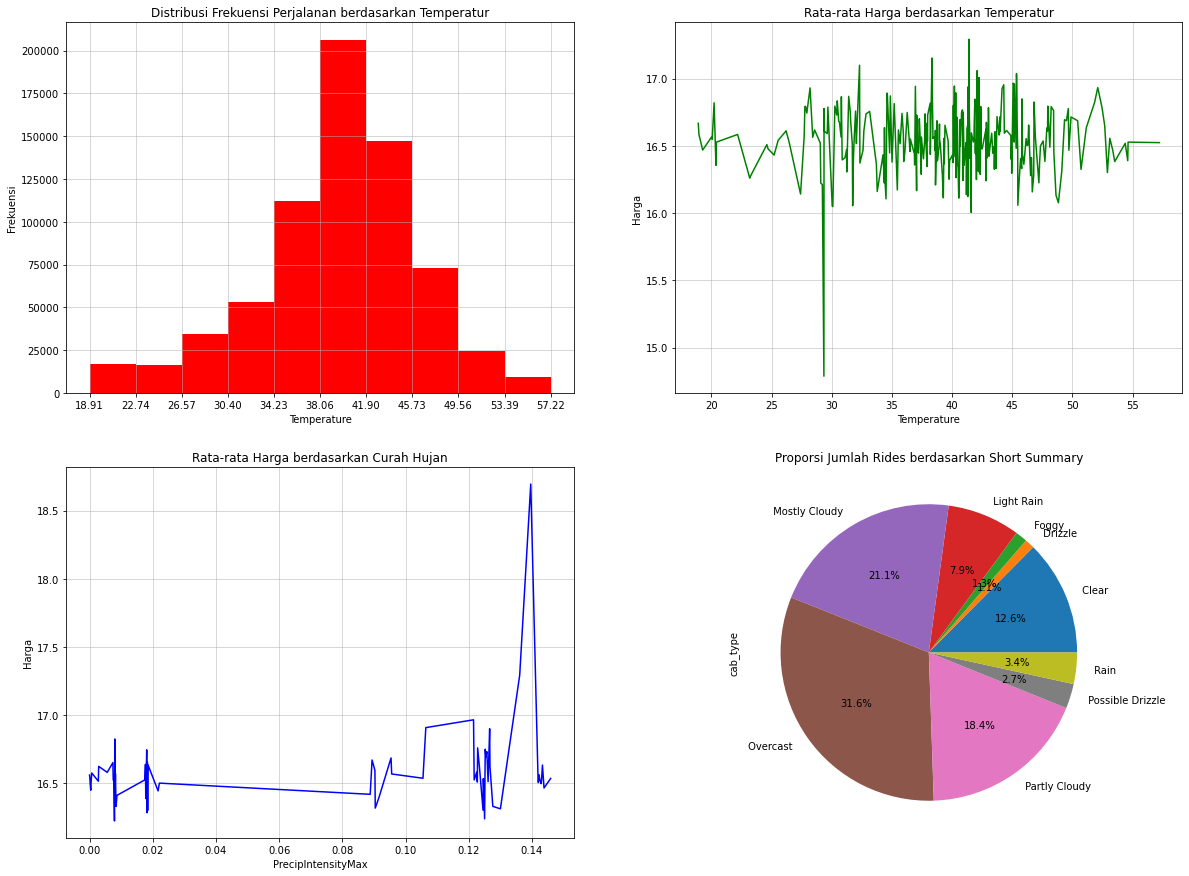

In [102]:
#Membuat subplot
fig = plt.figure(figsize=(20,15))

ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)

#Memecah dataset menjadi 15 bin
count, bin_edges = np.histogram(df_temp, 10)
#Distribusi frekuensi perjalanan dengan Uber dan Lyft berdasarkan temperaturenya
df_temp.plot(kind="hist", bins=10, xticks=bin_edges, color="red", ax=ax0)
ax0.set_title("Distribusi Frekuensi Perjalanan berdasarkan Temperatur")
ax0.set_xlabel("Temperature")
ax0.set_ylabel("Frekuensi")
ax0.grid(linewidth=0.5)

#Rata-rata harga berdasarkan temperature
df_temp_price.plot(kind="line", color="green", ax=ax1, legend=False)
ax1.set_title("Rata-rata Harga berdasarkan Temperatur")
ax1.set_xlabel("Temperature")
ax1.set_ylabel("Harga")
ax1.grid(linewidth=0.5)

#Rata-rata harga berdasarkan Curah Hujan (precipIntensityMax)
df_precip.plot(kind="line", color="blue", ax=ax2, legend=False)
ax2.set_title("Rata-rata Harga berdasarkan Curah Hujan")
ax2.set_xlabel("PrecipIntensityMax")
ax2.set_ylabel("Harga")
ax2.grid(linewidth=0.5)

#Proporsi jumlah rides berdasarkan short_summary
df_sum.plot(kind="pie", autopct='%1.1f%%', subplots=True, ax=ax3, legend=False)
ax3.set_title("Proporsi Jumlah Rides berdasarkan Short Summary")

Berdasarkan plot di atas, diketahui bahwa jumlah *rides* tinggi pada temperatur sekitar 38 sampai 41 derajat. Selain itu, temperature dan curah hujan tidak menghasilkan suatu hubungan linear atau dalam kata lain, korelasi sangat rendah. Selanjutnya, pada saat `short_summary` *overcast* proporsi jumlah *rides* tinggi. Artinya, pengguna banyak menggunakan layanan taksi pada saat cuaca mendung.

---

Berdasarkan analisis eksplorasi data di atas, dapat disimpulkan bahwa:
1. Penggandaan harga (`surge_multiplier`) dan jarak (`distance`) memiliki hubungan linear positif terhadap harga (`price`). Berarti kenaikan penggandaan harga dan jarak akan diikuti dengan kenaikan harga juga.
2. Pengguna banyak menggunakan layanan taksi , baik itu Uber maupun Lyft pada saat malam hari.
3. Tipe taksi Uber dan Lyft memiliki pengaruh terhadap variasi harga. Tipe taksi Black SUV pada Uber dan tipe taksi Lux Black XL pada Lyft menawarkan layanan dengan harga tertinggi. Sedangkan tipe taksi UberPool pada Uber dan tipe taksi Shared pada Lyft menawarkan layanan dengan harga terendah.
4. Pengguna banyak menggunakan layanan taksi pada saat mendung (*overcast*).
5. Uber tidak memberlakukan penggandaan harga, sedangkan Lyft memberlakukan penggandaan harga, sehingga dapat dikatakan bahwa Uber lebih ekonomis dibandingkan Lyft.

## Korelasi semua kolom karakteristik cuaca dengan kolom `price`

In [14]:
#drop kolom yang tidak perlu, dropping kolom berdasarkan informasi statistik yang tertera di sumber data
corr_data = df.copy()
corr_data.drop(["id","timestamp","timezone","source","destination",
        "long_summary","icon", "datetime","visibility.1",
        "latitude","longitude","icon","windGustTime",
        "temperatureHighTime","temperatureLowTime",
        "apparentTemperatureHighTime","apparentTemperatureLowTime",
        "sunriseTime","sunsetTime","uvIndexTime",
        "temperatureMinTime","temperatureMaxTime",
        "apparentTemperatureMinTime","apparentTemperatureMaxTime"], axis=1, inplace=True)

In [15]:
#mengubah kolom price menjadi float64
corr_data["price"]= pd.to_numeric(corr_data["price"])

<AxesSubplot:>

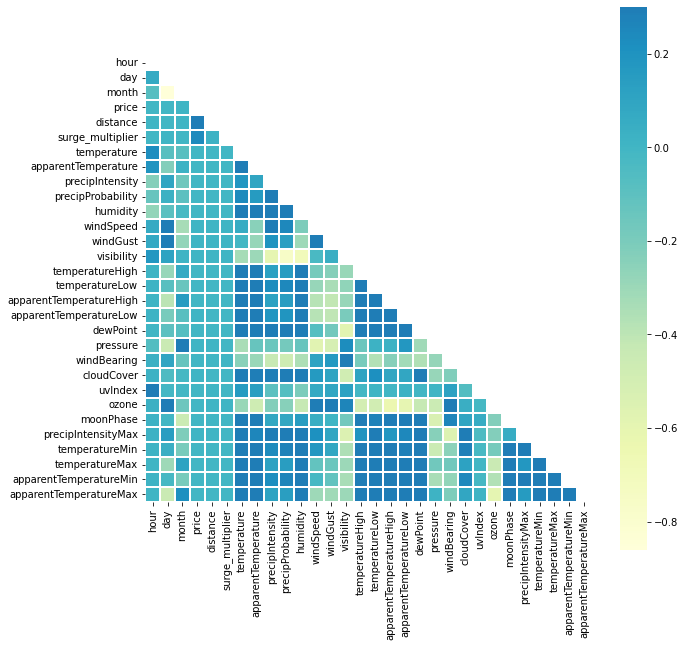

In [22]:
corrMatrix = corr_data.corr()

# Set up figur plot
f, ax = plt.subplots(figsize=(10, 20))

#Masking heatmap berbentuk segitiga
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))

# Heatmap correlation plot
sns.heatmap(corrMatrix, mask=mask, cmap="YlGnBu", vmax=.3, center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .5})

Berdasarkan *heatmap plot* di atas, diketahui bahwa kolom `price` hanya memiliki korelasi dengan kolom `distance` dan `surge_multiplier`, dan juga berdasarkan eksplorasi data di atas bahwa karakteristik cuaca tidak menunjukkan adanya pola hubungan dengan kolom `price`. Sehingga, variabel independen yang digunakan untuk model regresi adalah: kolom `hour`,`cab_type`,`name`,`distance`, dan `surge_multiplier`.

# Data preprocessing

In [4]:
#Fix columns
fix_col = ["hour","cab_type","name","distance","surge_multiplier","price"]
df1 = df[fix_col]

In [5]:
df1

,hour,cab_type,name,distance,surge_multiplier,price
0,9,Lyft,Shared,0.44,1.0,5.0
1,2,Lyft,Lux,0.44,1.0,11.0
2,1,Lyft,Lyft,0.44,1.0,7.0
3,4,Lyft,Lux Black XL,0.44,1.0,26.0
4,3,Lyft,Lyft XL,0.44,1.0,9.0
...,...,...,...,...,...,...
693066,23,Uber,UberXL,1.00,1.0,13.0
693067,23,Uber,UberX,1.00,1.0,9.5
693068,23,Uber,Taxi,1.00,1.0,NaN
693069,23,Uber,Black SUV,1.00,1.0,27.0


In [6]:
data = df1.copy()

## Nilai statistik masing-masing tipe kolom numerik

In [150]:
data.describe()

,hour,distance,surge_multiplier,price
count,693071.000000,693071.000000,693071.000000,637976.000000
mean,11.619137,2.189430,1.013870,16.545125
std,6.948114,1.138937,0.091641,9.324359
min,0.000000,0.020000,1.000000,2.500000
25%,6.000000,1.280000,1.000000,9.000000
50%,12.000000,2.160000,1.000000,13.500000
75%,18.000000,2.920000,1.000000,22.500000
max,23.000000,7.860000,3.000000,97.500000


In [27]:
#Memisahkan/memecah data
distance = data["distance"]
surge_multiplier = data["surge_multiplier"]
price = data["price"]

<AxesSubplot:>

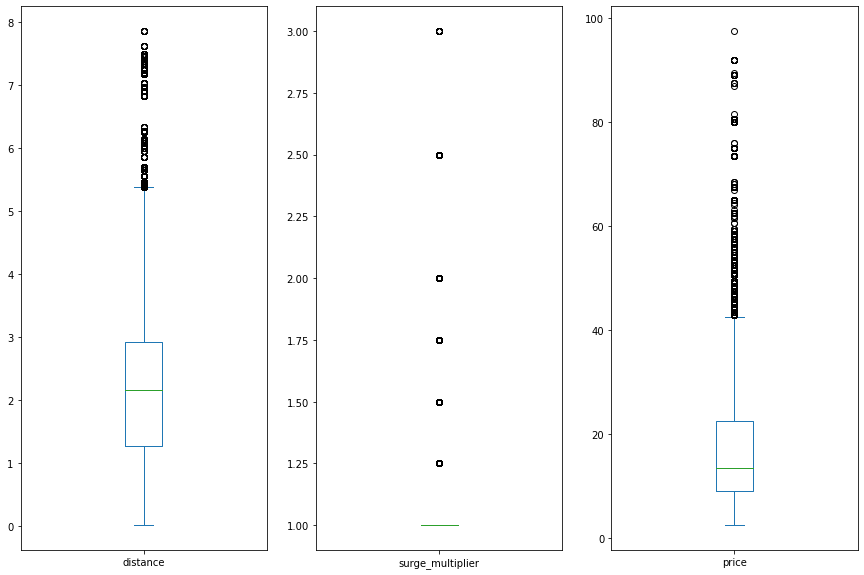

In [28]:
#Visualisasi dengan boxplot
#Membuat subplot
fig = plt.figure(figsize=(15,10))

ax0 = fig.add_subplot(1,3,1)
ax1 = fig.add_subplot(1,3,2)
ax2 = fig.add_subplot(1,3,3)

distance.plot(kind="box", ax=ax0)
surge_multiplier.plot(kind="box", ax=ax1)
price.plot(kind="box", ax=ax2)

## *Encoder* menggunakan OneHotEncoder

In [7]:
#from sklearn.preprocessing import OneHotEncoder
cat_col = data.select_dtypes(include=['object','category']).columns.tolist()

#encoder kolom dengan nilai kategorik
for col in cat_col:
    encoder = OneHotEncoder(handle_unknown='ignore')
    enc_df = pd.DataFrame(encoder.fit_transform(data[[col]]).toarray())
    enc_df.columns = encoder.get_feature_names([col])
    data = data.drop(col, axis=1)
    data = pd.concat([data, enc_df], axis=1)

C:\Users\Shavira Zhalsabilla\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Shavira Zhalsabilla\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
data

,hour,distance,surge_multiplier,price,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,9,0.44,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,0.44,1.0,11.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.44,1.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.44,1.0,26.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,0.44,1.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,23,1.00,1.0,13.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
693067,23,1.00,1.0,9.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
693068,23,1.00,1.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
693069,23,1.00,1.0,27.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#Mengurutkan kolom data
cols = ["hour",
        "distance",
        "surge_multiplier",
        "cab_type_Uber",
        "cab_type_Lyft",
        "name_UberX",
        "name_UberXL",
        "name_Black",
        "name_Black SUV",
        "name_WAV",
        "name_UberPool",
        "name_Taxi",
        "name_Shared",
        "name_Lyft",
        "name_Lyft XL",
        "name_Lux",
        "name_Lux Black",
        "name_Lux Black XL",
       "price"]
data = data[cols]

In [10]:
data

,hour,distance,surge_multiplier,cab_type_Uber,cab_type_Lyft,name_UberX,name_UberXL,name_Black,name_Black SUV,name_WAV,name_UberPool,name_Taxi,name_Shared,name_Lyft,name_Lyft XL,name_Lux,name_Lux Black,name_Lux Black XL,price
0,9,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0
2,1,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0
3,4,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0
4,3,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,23,1.00,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
693067,23,1.00,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.5
693068,23,1.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
693069,23,1.00,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


## Menghilangkan *missing values*

In [11]:
data.isnull().sum()

hour                     0
distance                 0
surge_multiplier         0
cab_type_Uber            0
cab_type_Lyft            0
name_UberX               0
name_UberXL              0
name_Black               0
name_Black SUV           0
name_WAV                 0
name_UberPool            0
name_Taxi                0
name_Shared              0
name_Lyft                0
name_Lyft XL             0
name_Lux                 0
name_Lux Black           0
name_Lux Black XL        0
price                55095
dtype: int64

Terdapat 55095 *missing values* pada kolom `price`.

In [12]:
data.dropna(inplace=True)

C:\Users\Shavira Zhalsabilla\anaconda3\envs\tf\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [13]:
data.isnull().sum()

hour                 0
distance             0
surge_multiplier     0
cab_type_Uber        0
cab_type_Lyft        0
name_UberX           0
name_UberXL          0
name_Black           0
name_Black SUV       0
name_WAV             0
name_UberPool        0
name_Taxi            0
name_Shared          0
name_Lyft            0
name_Lyft XL         0
name_Lux             0
name_Lux Black       0
name_Lux Black XL    0
price                0
dtype: int64

# Mendefinisikan model

Membagi data *training* dan *testing* dengan rasio 80:20.

In [14]:
X = data.drop("price", axis=1)
y = data["price"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
reg = LinearRegression()

# Melatih model

In [17]:
model = reg.fit(X_train.values,y_train.values)
y_pred = reg.predict(X_test.values)

In [18]:
print("Nilai koefisien regresi:\n", model.coef_)
print("Nilai intersep:\n", model.intercept_)

Nilai koefisien regresi:
 [ 2.94893073e-05  2.79838784e+00  1.82768422e+01 -2.62060120e+11
  2.64664945e+11  5.30516334e+11  5.30516334e+11  5.30516334e+11
  5.30516334e+11  5.30516334e+11  5.30516334e+11  1.01440166e+10
  3.79126898e+09  3.79126898e+09  3.79126899e+09  3.79126899e+09
  3.79126899e+09  3.79126900e+09]
Nilai intersep:
 -268456214480.49832


# Evaluasi performa model

Nilai $R^2$ model regresi pada data *testing*

In [19]:
r2_score(y_test, y_pred)

0.9282085505221743

---

Mengecek nilai $R^2$ pada data *training*

In [20]:
y_train_pred = reg.predict(X_train)
r2_score(y_train, y_train_pred)

C:\Users\Shavira Zhalsabilla\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.9270379893310554

---

Diketahui nilai $R^2$ pada model regresi yang diuji yang didapat adalah 0.9282 atau dalam persentase 92.82%. Artinya, variabel-variabel dalam data dapat menjelaskan variasi `price` atau harga sebesar 92.82%. Terdapat 7.18% faktor lain yang tidak dimasukkan ke dalam data.

Selain dari nilai $R^2$, dapat juga dilihat dari nilai RMSE (*Root Mean Square Error*) dan MAE (*Mean Absolute Error*).

In [21]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)

2.484722466800299


In [22]:
mae = mean_absolute_error(y_test,y_pred)
mae

1.766302084022153

Diketahui nilai RMSE yang didapat adalah 2.485 dan nilai MAE yang didapat adalah 1.7661. Selanjutnya akan dilihat bagaimana plot perbandingan antara nilai asli dengan nilai prediksinya:

In [27]:
#Membuat array dari nilai y_test
y_test_vis = np.array(y_test)
y_test_vis

array([19.5, 10.5,  5. , ...,  8. , 16.5,  7. ])

In [198]:
y_pred

array([21.06113052, 11.55919266,  8.20010376, ...,  9.05730438,
       19.1088829 ,  5.40396881])

In [28]:
#Membuat dataframe nilai y_test dan y_prabsed
resid = pd.DataFrame(y_pred, y_test_vis)
resid = resid.reset_index()
resid = resid.rename(columns={"index":"actual_val",
                             0:"predict_val"})

In [29]:
#Menambahkan kolom dari selisih antara nilai y_test dan y_pred
resid["residual"] = resid["actual_val"] - resid["predict_val"]
resid

,actual_val,predict_val,residual
0,19.5,21.065948,-1.565948
1,10.5,11.553314,-1.053314
2,5.0,8.196320,-3.196320
3,16.5,16.851074,-0.351074
4,38.5,33.440887,5.059113
...,...,...,...
127591,9.5,11.617798,-2.117798
127592,19.5,20.478577,-0.978577
127593,8.0,9.043335,-1.043335
127594,16.5,19.112091,-2.612091


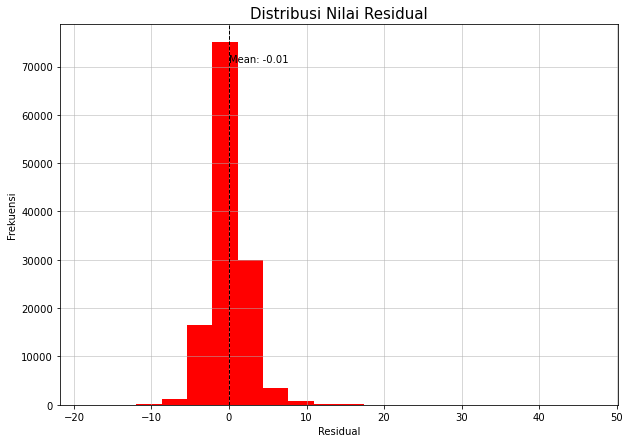

In [30]:
#Plotting
dist_resid = resid["residual"]
dist_resid.plot(kind="hist", figsize=(10,7), bins=20, color="r")
plt.title("Distribusi Nilai Residual", fontsize=15)
plt.xlabel("Residual", fontsize=10)
plt.ylabel("Frekuensi", fontsize=10)
plt.grid(linewidth=0.5)
plt.axvline(dist_resid.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(dist_resid.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(dist_resid.mean()))
plt.show()

Berdasarkan plot di atas, diketahui bahwa nilai residual menyebar di sekitar 0 dengan mean = -0.01. Ini berarti residual berdistribusi normal dan memenuhi salah satu asumsi klasik regresi linear. Dapat dikatakan bahwa model regresi yang didapat baik dalam memprediksi nilai variabel dependennya.

# Model Inference

Untuk menguji keakuratan model, dilakukan *model inference* untuk menguji model dengan data di luar data yang tersedia.

Misal seseorang ingin melihat berapa prediksi harga taksi yang harus ia keluarkan. Saat itu waktu menunjukkan pukul jam 4 sore. Diketahui jarak yang ingin ditempuh adalah 2.5 km. Pada hari itu, ia ingin menggunakan taksi Uber dengan tipe taksi UberXL sehingga tidak berlaku adanya penggandaan harga.

In [44]:
hour = int(input("Hour:"))
distance = float(input("Distance:"))
surge = float(input("Surge Multiplier:"))
types = input("Uber/Lyft?")
ride = input("Ride Types:")

val = [hour, distance, surge]

cab_types = {"Uber":0,
            "Lyft":1}

for i in range(0,2):
    if cab_types[types]==i:
        val.append(1.0)
    else:
        val.append(0.0)
        
ride_types = {"UberX" : 0,
                 "UberXL" : 1,
                 "Black" : 2,
                 "BlackSUV": 3,
                 "WAV" : 4,
                 "UberPool" : 5,
                 "Taxi" : 6,
                 "Shared" : 7,
                 "Lyft" : 8,
                 "LyftXL" : 9,
                 "Lux": 10,
                 "LuxBlack" : 11,
                 "LuxBlackXL" : 12}

for i in range(0,13):
    if ride_types[ride]==i:
        val.append(1.0)
    else:
        val.append(0.0)

print(val)

predict = reg.predict([val])

print("Here's your estimated price:", predict)

Hour:16
Distance:2.5
Surge Multiplier:1
Uber/Lyft?Uber
Ride Types:UberXL
[16, 2.5, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Here's your estimated price: [16.53466797]


Misal seseorang ingin melihat berapa prediksi harga taksi yang harus ia keluarkan. Saat itu waktu menunjukkan pukul jam 9 pagi. Diketahui jarak yang ingin ditempuh adalah 1.2 km. Pada hari itu, ia ingin menggunakan taksi Lyft dengan tipe taksi Shared.

In [48]:
hour = int(input("Hour:"))
distance = float(input("Distance:"))
surge = float(input("Surge Multiplier:"))
types = input("Uber/Lyft?")
ride = input("Ride Types:")

val = [hour, distance, surge]

cab_types = {"Uber":0,
            "Lyft":1}

for i in range(0,2):
    if cab_types[types]==i:
        val.append(1.0)
    else:
        val.append(0.0)
        
ride_types = {"UberX" : 0,
                 "UberXL" : 1,
                 "Black" : 2,
                 "BlackSUV": 3,
                 "WAV" : 4,
                 "UberPool" : 5,
                 "Taxi" : 6,
                 "Shared" : 7,
                 "Lyft" : 8,
                 "LyftXL" : 9,
                 "Lux": 10,
                 "LuxBlack" : 11,
                 "LuxBlackXL" : 12}

for i in range(0,13):
    if ride_types[ride]==i:
        val.append(1.0)
    else:
        val.append(0.0)

print(val)

predict = reg.predict([val])

print("Here's your estimated price:", predict)

Hour:9
Distance:2
Surge Multiplier:1.25
Uber/Lyft?Lyft
Ride Types:Shared
[9, 2.0, 1.25, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Here's your estimated price: [10.07907104]


# Conclusions

Berdasarkan keseluruhan hasil analisis di atas, dapat disimpulkan bahwa:
1. *Project* ini berisikan tentang penerapan **LinearRegression** pada dataset Uber & Lyft. Dataset ini terdiri dari 693071 observasi/baris dan 57 fitur/kolom tentang data harga perjalanan menggunakan taksi Uber & Lyft berdasarkan waktu, penggandaan harga (*surge multiplier*), jarak, dan keadaan cuaca pada saat itu. Variabel dependen/responnya adalah `price`.
2. Pengguna banyak menggunakan layanan taksi , baik itu Uber maupun Lyft pada saat malam hari.
3. Tipe taksi Uber dan Lyft memiliki pengaruh terhadap variasi harga. Tipe taksi Black SUV pada Uber dan tipe taksi Lux Black XL pada Lyft menawarkan layanan dengan harga tertinggi.
4. Pengguna banyak menggunakan layanan taksi pada saat mendung (*overcast*).
5. Uber tidak memberlakukan penggandaan harga, sedangkan Lyft memberlakukan penggandaan harga, sehingga dapat dikatakan bahwa Uber lebih ekonomis dibandingkan Lyft.
6. Berdasarkan hasil eksplorasi data, variabel independen yang digunakan untuk memprediksi variabel dependennya adalah:

    -`distance`: jarak
    
    -`surge_multiplier`: penggandaan harga
    
    -`hour`: jam
    
    -`cab_type`: tipe taksi
    
    -`name`: jenis layanan taksi
    
7. Model regresi memiliki nilai $R^2$ sebesar 0.9282 atau dalam persentase 92.82%, yang artinya variabel-variabel independennya cukup baik dalam menjelaskan/memprediksi variasi nilai dependennya. Selain itu, nilai RMSE dan MAE dari model juga cenderung kecil yaitu sebesar 2.48 dan 1.776.
8. Residual dari model regresi berdistribusi normal sehingga memenuhi salah satu asumsi klasik regresi linear.

# Save model

In [23]:
pickle.dump(reg, open('reg_model.pkl','wb'))